In [4]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

In [16]:
df = pd.read_csv('Data/Weekly.csv')
print(df.shape)
df.head()

(1089, 9)


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [125]:
df.replace({"Up": 1, "Down": 0}, inplace=True)
X = df.drop(columns="Direction")
y = df["Direction"]
df

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,1
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,1
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,1
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,1


### LOOCV

In [126]:
from sklearn.model_selection import LeaveOneOut

def get_LOO(X, y, model, loss):
    loo_res = []
    loo = LeaveOneOut()
    loo.get_n_splits(X)

    for train_index, test_index in loo.split(X):
        X_i = X.loc[train_index]
        y_i = y[train_index]

        model.fit(X_i, y_i)
        loo_res.append(
            loss(
                model.predict(X.loc[test_index]), 
                y[test_index]
            )
        )
    loo_res
    loo_res = np.array(loo_res)
    return loo_res

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import zero_one_loss

get_LOO(X[["Lag1", "Lag2"]], y, LogisticRegression(), zero_one_loss)
print("LOOCV test error:", loo_res.mean())

LOOCV test error: 0.44995408631772266


In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

1 - logit.fit(X_train[regress_on], y_train).score(X_test[regress_on], y_test)

0.47706422018348627

## Simulated data

In [137]:
np.random.seed(42)

def f(x):
    return x - 2 * x**2

X = np.random.normal(size=100)
y = f(X) + np.random.normal(size=100)

C:\Users\леопольд\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\леопольд\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Test error d = 1 :  5.302956627689594
    coefs stderr tvalues pvalues
1  -1.571  0.223   -7.03  0.0000
x0  1.589  0.246    6.47  0.0000

n=100 p=2 Residual SD=2.220 R-squared=0.30
Test error d = 2 :  0.9127641950599265
      coefs stderr tvalues pvalues
1    -0.138  0.115   -1.20  0.2335
x0    0.924  0.108    8.58  0.0000
x0^2 -1.816  0.085  -21.42  0.0000

n=100 p=3 Residual SD=0.932 R-squared=0.88


C:\Users\леопольд\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Test error d = 3 :  0.956957297774952
      coefs stderr tvalues pvalues
1    -0.152  0.121   -1.26  0.2116
x0    0.864  0.186    4.65  0.0000
x0^2 -1.793  0.102  -17.53  0.0000
x0^3  0.028  0.071    0.40  0.6922

n=100 p=4 Residual SD=0.936 R-squared=0.88


C:\Users\леопольд\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Test error d = 4 :  0.9727724672791456
      coefs stderr tvalues pvalues
1    -0.208  0.130   -1.60  0.1135
x0    1.012  0.226    4.49  0.0000
x0^2 -1.588  0.205   -7.75  0.0000
x0^3 -0.063  0.106   -0.59  0.5581
x0^4 -0.066  0.058   -1.15  0.2529

n=100 p=5 Residual SD=0.934 R-squared=0.88


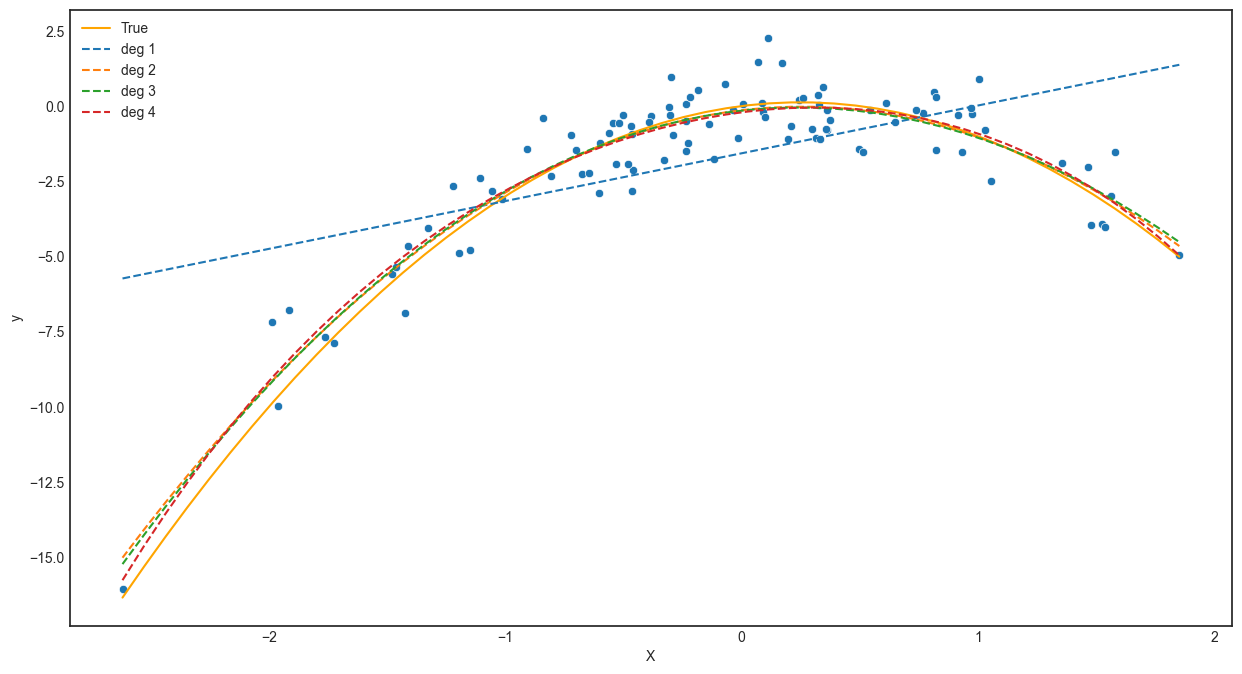

In [138]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.scatterplot(x=X, y=y, ax=ax)

ax.set_ylabel("y")
ax.set_xlabel("X")

ix = np.linspace(X.min(), X.max(), num=50)
sns.lineplot(x=ix, y=f(ix), color="orange", label="True", ax=ax)

linreg = LinearRegression(fit_intercept=True)
loos = {}

for d in np.arange(1, 5):
    pol_feat = PolynomialFeatures(d).fit(X.reshape(-1, 1))
    X_pol = pd.DataFrame(
        pol_feat.transform(X.reshape(-1, 1)),
        columns=pol_feat.get_feature_names_out()
    )
    
    linreg.fit(X_pol, y)
    
    pred = linreg.predict(
        pol_feat.transform(
           ix.reshape(-1, 1)
        )
    )
    loos[d] = get_LOO(X_pol, y, linreg, mean_squared_error)
    print("Test error d =", d, ": ", loos[d].mean())
    sm.OLS(y, X_pol).fit().sumary()
    sns.lineplot(x=ix, y=pred, ls='--', label="deg "+str(d), ax=ax)

Changing the random seed:

In [128]:
np.random.seed(43)

C:\Users\леопольд\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Test error d = 1 :  4.963123597533385
    coefs stderr tvalues pvalues
1  -1.389  0.223   -6.22  0.0000
x0 -0.867  0.233   -3.72  0.0003

n=100 p=2 Residual SD=2.170 R-squared=0.12


C:\Users\леопольд\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Test error d = 2 :  0.9412779986103864
      coefs stderr tvalues pvalues
1     0.064  0.122    0.52  0.6019
x0    0.762  0.130    5.84  0.0000
x0^2 -1.980  0.098  -20.20  0.0000

n=100 p=3 Residual SD=0.956 R-squared=0.83


C:\Users\леопольд\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\леопольд\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Test error d = 3 :  0.9623584599512301
      coefs stderr tvalues pvalues
1     0.069  0.134    0.51  0.6085
x0    0.751  0.172    4.38  0.0000
x0^2 -1.990  0.149  -13.34  0.0000
x0^3  0.007  0.081    0.09  0.9268

n=100 p=4 Residual SD=0.961 R-squared=0.83
Test error d = 4 :  0.9648872745222066
      coefs stderr tvalues pvalues
1     0.139  0.146    0.95  0.3450
x0    0.979  0.260    3.77  0.0003
x0^2 -2.190  0.227   -9.65  0.0000
x0^3 -0.160  0.165   -0.97  0.3350
x0^4  0.091  0.078    1.16  0.2472

n=100 p=5 Residual SD=0.959 R-squared=0.83


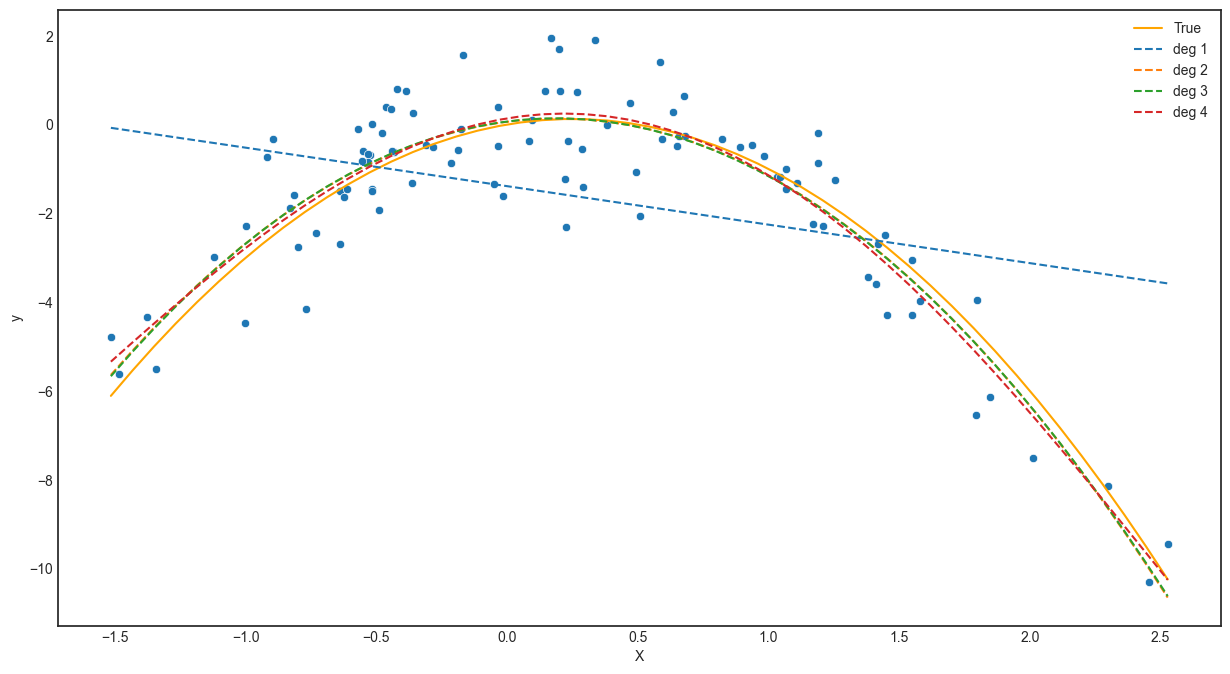

In [136]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import faraway.utils

X = np.random.normal(size=100)
y = f(X) + np.random.normal(size=100)

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.scatterplot(x=X, y=y, ax=ax)

ax.set_ylabel("y")
ax.set_xlabel("X")

ix = np.linspace(X.min(), X.max(), num=50)
sns.lineplot(x=ix, y=f(ix), color="orange", label="True", ax=ax)

linreg = LinearRegression(fit_intercept=True)
loos = {}

for d in np.arange(1, 5):
    pol_feat = PolynomialFeatures(d).fit(X.reshape(-1, 1))
    X_pol = pd.DataFrame(
        pol_feat.transform(X.reshape(-1, 1)),
        columns=pol_feat.get_feature_names_out()
    )
    
    linreg.fit(X_pol, y)
    
    pred = linreg.predict(
        pol_feat.transform(
           ix.reshape(-1, 1)
        )
    )
    loos[d] = get_LOO(X_pol, y, linreg, mean_squared_error)
    print("Test error d =", d, ": ", loos[d].mean())
    sm.OLS(y, X_pol).fit().sumary()
    sns.lineplot(x=ix, y=pred, ls='--', label="deg "+str(d), ax=ax)